In [3]:
!pip install pytesseract

  Obtaining dependency information for pytesseract from https://files.pythonhosted.org/packages/c5/54/ec007336f38d2d4ce61f3544af3e6855dacbf04a1ac8294f10cabe81146f/pytesseract-0.3.10-py3-none-any.whl.metadata


In [4]:
!pip install opencv-python

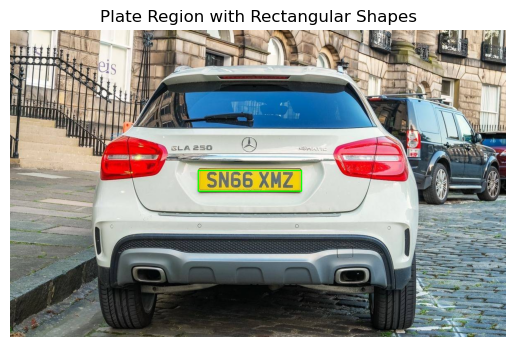

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to extract plate region
def extract_plate_region(image):
    # Convert the image to HSV format
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the lower and upper bounds for yellow color
    lower_yellow = np.array([12, 100, 100])
    upper_yellow = np.array([35, 255, 255])
    
    # Create a mask to extract yellow regions
    yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Iterate through the contours to find the largest rectangular contour
    max_area = 0
    max_contour = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            max_contour = contour
    
    # Approximate the contour to a polygon
    epsilon = 0.1 * cv2.arcLength(max_contour, True)
    approx_polygon = cv2.approxPolyDP(max_contour, epsilon, True)
    
    return approx_polygon

# Read the input image
input_image = cv2.imread('img1.jpg')

# Extract the plate region
plate_region = extract_plate_region(input_image)

# Create a blank mask with the same dimensions as the input image
mask = np.zeros_like(input_image[:, :, 0])

# Draw the plate region on the mask
cv2.drawContours(mask, [plate_region], -1, (255, 255, 255), thickness=cv2.FILLED)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours to find rectangular shapes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(input_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the input image with rectangular shapes over the plate region
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Plate Region with Rectangular Shapes')
plt.show()
